In [53]:
import random
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from nn import MLP
from engine import Value

In [54]:
np.random.seed(1337)
random.seed(1337)

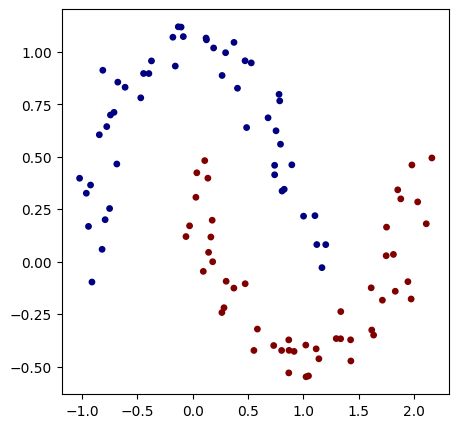

In [55]:
from sklearn.datasets import make_moons
X, y = make_moons(noise=0.1)
y = y*2 - 1 # make y be -1 or 1

plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=15, cmap='jet')

In [56]:
model = MLP(2, [16, 16, 1])
print(model)
print(f'Number of parameters: {len(model.parameters())}')

MLP of [Layer of [Neuron(2), Neuron(2), Neuron(2), Neuron(2), Neuron(2), Neuron(2), Neuron(2), Neuron(2), Neuron(2), Neuron(2), Neuron(2), Neuron(2), Neuron(2), Neuron(2), Neuron(2), Neuron(2)], Layer of [Neuron(16), Neuron(16), Neuron(16), Neuron(16), Neuron(16), Neuron(16), Neuron(16), Neuron(16), Neuron(16), Neuron(16), Neuron(16), Neuron(16), Neuron(16), Neuron(16), Neuron(16), Neuron(16)], Layer of [Neuron(16)]]
Number of parameters: 337


In [63]:
def loss():
    inputs = [list(map(Value, xrow)) for xrow in X]
    results = list(map(model, inputs))

    loss = sum([(result-yi)**2 for result, yi in zip(results, y)])

    accuracy = sum([(result.data > 0) == (yi > 0) for result, yi in zip(results, y)]) / len(inputs)
    
    return loss, accuracy

loss, acc = loss()
print(f'Loss: {loss.data}, accuracy: {acc*100}%')

Loss: 108.72699829557594, accuracy: 68.0%
